In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Ensure you have the correct path to your zip file
# If you're using Google Colab, you can mount your Google Drive to access files
# Corrected path to zip file
zip_path = "/content/VehiclesDetectionDataset.zip" # upload the file and copy , paste the path here.
extract_path = "/content/VehiclesDetectionDataset"  # Directory where you want to extract to

# Verify if the file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"Zip file not found at: {zip_path}")

# Try opening the file to check its integrity
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # If this line executes without error, the file is likely a valid zip
        pass
except zipfile.BadZipFile:
    raise ValueError(f"The file at {zip_path} is not a valid zip file. Please check if it is corrupted or a different file type.")

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [3]:
!ls /content/VehiclesDetectionDataset/


dataset.yaml  test  train  valid


In [4]:
!ls /content/VehiclesDetectionDataset/train/images


005980b3a5f93085_jpg.rf.2QZCXGReqcBORWQJKQfO.jpg
005980b3a5f93085_jpg.rf.68f1ed44dbca53b707a1d3d82d4b7d9a.jpg
00aaf0a0a9ee7e71_jpg.rf.808b1e59067887493dffad63561c2a9d.jpg
00aaf0a0a9ee7e71_jpg.rf.KBCzX2HtZviBuQY9JDTQ.jpg
00e0422e47cdbeb7_jpg.rf.a8b6f2ef17a14eb8b9228d26366a124d.jpg
00e0422e47cdbeb7_jpg.rf.yHmAn1jB2oy8XzzQPBzc.jpg
00e13aca7d2f904a_jpg.rf.52342966f5a37167f8cfd7ea3f4dacef.jpg
00e13aca7d2f904a_jpg.rf.eQwpgo07vRFeI7SgvXy6.jpg
00e2d9121adc0c20_jpg.rf.50fa25618ccc9f0ebf59f2ffe64cf298.jpg
00e2d9121adc0c20_jpg.rf.rPP5CqB9mOv9wnRTTKR3.jpg
011a8a0a921c2376_jpg.rf.064272f1b667f68b4340d240244ff7e8.jpg
011a8a0a921c2376_jpg.rf.tflPpvQDTaDj9gH1xuDJ.jpg
0133391d627e6df4_jpg.rf.5fb6cc71948fdee8e2e7cbc9bbc5aeb1.jpg
0133391d627e6df4_jpg.rf.xszyOWdyIGCiI2HmiGNr.jpg
013476982d77e380_jpg.rf.3abcf2c4c484148e9e88d3c8c99bc236.jpg
013476982d77e380_jpg.rf.E6oudaF78aSJULyWaSIS.jpg
0158307c4ad94b38_jpg.rf.6VgRLvEWkhSwfdBdY9Fi.jpg
0158307c4ad94b38_jpg.rf.7c3ac0278eaf3a1773359994c4679aca.jpg
020fcce8dd

In [5]:
train_path = "/content/VehiclesDetectionDataset/train/images"
val_path = "/content/VehiclesDetectionDataset/valid/images"
test_path = "/content/VehiclesDetectionDataset/test/images"

In [6]:
import os

image_files = os.listdir(train_path)[:10]  # Show first 10 image files
print("Sample Images:", image_files)

Sample Images: ['559a81baaab7e2df_jpg.rf.GivwgeNUFBPoOfPR2Zp9.jpg', '7845ed5a26cb9fd4_jpg.rf.4774c33772ba8a86565de0d4ab90a688.jpg', '4e1842c6c439df43_jpg.rf.2qUt4zoudWTO78P4Miuy.jpg', '40b4b49db4472185_jpg.rf.rPaRyidH0UQpvwT75EUh.jpg', '7bec73d280fb3fb3_jpg.rf.eaec6eac3321632d7b4ec7f389df3388.jpg', 'd5982e8c9f63acc8_jpg.rf.hMEeo6mcB2PbKE87hBkS.jpg', 'a9cbd4910c5d9086_jpg.rf.745e39167533eb455ed1c48318582467.jpg', 'bf0fd1bb683dab7c_jpg.rf.gXEskWLFbjcDoKcjWkoY.jpg', '09fd3f0199f2be7e_jpg.rf.afd5e30f9d5d3cae89ecd8aafec6b7f1.jpg', '43f9dfb36618117e_jpg.rf.M4qVoc5zT12i7UZyeaIZ.jpg']


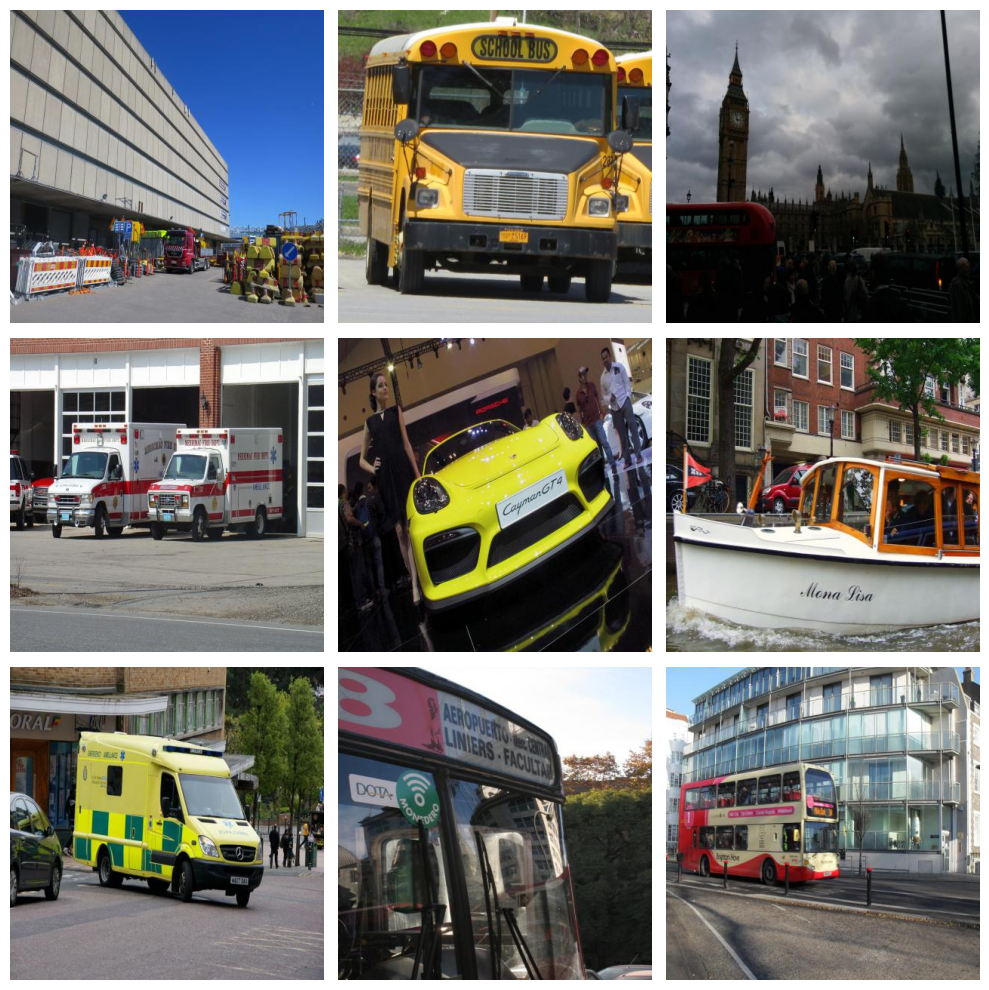

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Select random images
selected_images = random.sample(os.listdir(train_path), 9)

# Plot images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(train_path, selected_images[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


#YOLO v8

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [9]:
from ultralytics import YOLO
import os
import cv2
import torch
import matplotlib.pyplot as plt
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
# Load YOLOv8 model_y8
model_y8 = YOLO("yolov8s.pt")  # Pre-trained YOLOv8 model_y8

# Train YOLO model_y8 on your dataset
results = model_y8.train(data="/content/VehiclesDetectionDataset/dataset.yaml", epochs=20, imgsz=640)

# Access metrics directly from the results object
#Now you can access metrics
map50_95 = results.box.map # Access mAP50-95 using results.box.map
print(f"mAP50-95: {map50_95}")

# Access other metrics like precision, recall, F1-score etc. as needed
print(results.box.p) # precision
print(results.box.r) # recall
print(results.box.f1) # F1

100%|██████████| 21.5M/21.5M [00:00<00:00, 276MB/s]


Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/VehiclesDetectionDataset/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 43.6MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117983  ultralytics.nn.modules.head.Detect           [5, [128, 256, 512]]          
Model summary: 129 layers, 11,137,535 parameters, 11,137,519 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 159MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 95.9±190.7 MB/s, size: 29.7 KB)


train: Scanning /content/VehiclesDetectionDataset/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<00:00, 1070.74it/s]


train: New cache created: /content/VehiclesDetectionDataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.2±4.9 MB/s, size: 33.0 KB)


val: Scanning /content/VehiclesDetectionDataset/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 425.14it/s]

val: New cache created: /content/VehiclesDetectionDataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.5G      1.086      2.373      1.399         39        640: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        250        454      0.273      0.451      0.302      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.3G      1.145      1.821      1.418         47        640: 100%|██████████| 55/55 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        250        454      0.365      0.288      0.265      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.33G       1.23      1.809      1.506         63        640: 100%|██████████| 55/55 [00:17<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        250        454      0.475      0.345      0.289      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.37G      1.256      1.866      1.512         46        640: 100%|██████████| 55/55 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all        250        454      0.606      0.228      0.246      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.41G      1.203      1.714      1.461         49        640: 100%|██████████| 55/55 [00:18<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        250        454       0.46      0.307      0.355      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.44G      1.212      1.657      1.472         39        640: 100%|██████████| 55/55 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        250        454      0.332      0.459      0.307       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.48G      1.172      1.598      1.429         60        640: 100%|██████████| 55/55 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        250        454      0.588       0.39      0.426      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.51G       1.09      1.468      1.401         45        640: 100%|██████████| 55/55 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        250        454      0.459      0.461      0.435       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.55G      1.092      1.396      1.384         45        640: 100%|██████████| 55/55 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        250        454       0.47      0.508      0.464      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.59G      1.034      1.269      1.356         64        640: 100%|██████████| 55/55 [00:17<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        250        454      0.472      0.519      0.475      0.335


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.62G      1.039      1.217      1.401         24        640: 100%|██████████| 55/55 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        250        454      0.631      0.439      0.501      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.66G     0.9472       1.11      1.309         27        640: 100%|██████████| 55/55 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        250        454      0.626       0.45      0.528      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       4.7G     0.9293      0.995      1.294         15        640: 100%|██████████| 55/55 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]

                   all        250        454      0.698      0.482      0.552      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.73G     0.8836     0.8977      1.256         23        640: 100%|██████████| 55/55 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        250        454      0.631      0.499      0.551      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.77G      0.824     0.8123      1.216         21        640: 100%|██████████| 55/55 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        250        454      0.636      0.537      0.566      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       4.8G      0.787     0.7601      1.185         25        640: 100%|██████████| 55/55 [00:17<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        250        454      0.642      0.575      0.595      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.84G     0.7415     0.6718      1.158         21        640: 100%|██████████| 55/55 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        250        454      0.667      0.565      0.579      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.88G     0.7095     0.6115      1.116         25        640: 100%|██████████| 55/55 [00:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        250        454        0.6      0.567      0.587      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.91G     0.6748     0.5714      1.096         28        640: 100%|██████████| 55/55 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        250        454      0.677      0.569      0.594      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.95G     0.6568      0.545      1.082         26        640: 100%|██████████| 55/55 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        250        454      0.624      0.616      0.624      0.462



20 epochs completed in 0.120 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]


                   all        250        454      0.627      0.616      0.624      0.463
             Ambulance         50         64      0.827      0.812      0.858      0.725
                   Bus         30         46      0.592      0.696      0.711      0.562
                   Car         90        238      0.632      0.505      0.534      0.369
            Motorcycle         42         46      0.553      0.652      0.555      0.313
                 Truck         38         60       0.53      0.413      0.464      0.343
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train
mAP50-95: 0.4625039404930779
[     0.8268     0.59222     0.63179     0.55264     0.52979]
[     0.8125     0.69565     0.50466     0.65217     0.41319]
[    0.81959     0.63978     0.56111     0.59829     0.46428]



image 1/1 /content/VehiclesDetectionDataset/valid/images/239ec3953a0b0bb0_jpg.rf.PRvU95hAnF7itR0UHpfo.jpg: 640x640 1 truck, 12.8ms
Speed: 3.4ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


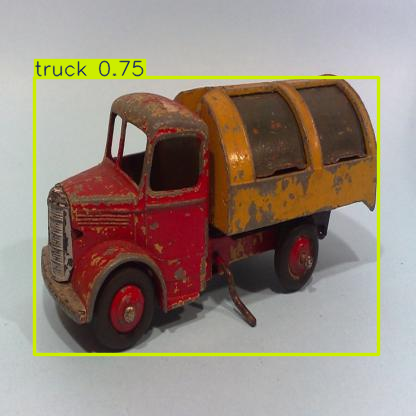

In [11]:
# Load the trained model_y8
model_y8 = YOLO("yolov8s.pt")  # Update path based on your run

# Define a sample image path
# img_path = "/content/VehiclesDetectionDataset/test/images/"
img_path ='/content/VehiclesDetectionDataset/valid/images/239ec3953a0b0bb0_jpg.rf.PRvU95hAnF7itR0UHpfo.jpg'
# Run inference
results = model_y8(img_path)

# results.show()

# # # Display the detected image
for r in results:
    r.show()

#YOLOv11

In [12]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
import torch
from google.colab.patches import cv2_imshow

# Set paths
DATA_YAML = "/content/VehiclesDetectionDataset/dataset.yaml"
MODEL_PATH = "yolo11m.pt"  # Ensure this model file is uploaded or trained previously

# Load the YOLOv11 model
model_y11 = YOLO(MODEL_PATH)

model_y11.train(  data=DATA_YAML,  epochs=20,   imgsz=640,   batch=16,   name='yolo11m_finetuned',
    mosaic=1.0,  hsv_h=0.015, hsv_s=0.7,  hsv_v=0.4,  fliplr=0.5,  auto_augment='randaugment',
    cos_lr=True,  patience=15,  workers=4
)

print("Model loaded successfully! Now run Step 2 to detect objects in any image.")

100%|██████████| 38.8M/38.8M [00:00<00:00, 180MB/s]


Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/VehiclesDetectionDataset/dataset.yaml, epochs=20, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolo11m_finetuned, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/VehiclesDetectionDataset/train/labels.cache... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±1.3 ms, read: 340.6±195.9 MB/s, size: 33.0 KB)


val: Scanning /content/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo11m_finetuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11m_finetuned
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.27G      1.178      2.348      1.493         39        640: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        250        454      0.121      0.271      0.117     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.29G      1.442      2.209      1.668         47        640: 100%|██████████| 55/55 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        250        454     0.0327      0.213     0.0341     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.26G      1.562      2.354      1.818         63        640: 100%|██████████| 55/55 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        250        454      0.812      0.025     0.0106    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.28G      1.537      2.362      1.776         46        640: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        250        454      0.342      0.152     0.0705     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.21G      1.511      2.259       1.75         49        640: 100%|██████████| 55/55 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        250        454      0.556      0.144      0.144     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.24G       1.46       2.15      1.726         39        640: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        250        454       0.87      0.138      0.156     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.27G      1.403      2.129       1.68         60        640: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        250        454      0.432      0.329      0.215       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.26G      1.357       2.02      1.655         45        640: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        250        454      0.316      0.303      0.267      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.23G      1.309        1.9      1.607         45        640: 100%|██████████| 55/55 [00:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        250        454      0.527      0.326      0.301      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.29G      1.286      1.838      1.591         64        640: 100%|██████████| 55/55 [00:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        250        454      0.552      0.338      0.357      0.234


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.26G      1.282      1.793      1.659         24        640: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        250        454      0.527      0.366      0.388       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.26G      1.172      1.594      1.553         27        640: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        250        454      0.493      0.388      0.432      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.21G       1.12      1.469      1.505         15        640: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        250        454      0.468      0.549      0.468      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.24G      1.116      1.399      1.492         23        640: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        250        454      0.492      0.544      0.488      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.25G       1.05      1.284      1.439         21        640: 100%|██████████| 55/55 [00:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        250        454      0.603      0.526       0.55      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.26G     0.9719      1.203      1.376         25        640: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        250        454      0.596      0.494      0.552      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.21G     0.9257      1.069      1.354         21        640: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        250        454      0.617      0.503      0.546      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.24G     0.9027      1.029      1.321         25        640: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        250        454      0.664      0.489       0.57      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.25G     0.8707     0.9824      1.297         28        640: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        250        454      0.582      0.535      0.576      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.26G      0.872     0.9784      1.299         26        640: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        250        454      0.665      0.493      0.574      0.418



20 epochs completed in 0.207 hours.
Optimizer stripped from runs/detect/yolo11m_finetuned/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/yolo11m_finetuned/weights/best.pt, 40.5MB

Validating runs/detect/yolo11m_finetuned/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        250        454      0.584      0.535      0.577       0.42
             Ambulance         50         64      0.842      0.875      0.895      0.751
                   Bus         30         46      0.618      0.652      0.637      0.517
                   Car         90        238      0.583      0.487      0.495      0.329
            Motorcycle         42         46      0.465      0.391      0.518      0.274
                 Truck         38         60      0.412      0.267       0.34      0.228
Speed: 0.3ms preprocess, 11.8ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/yolo11m_finetuned
Model loaded successfully! Now run Step 2 to detect objects in any image.


Enter the image path: /content/VehiclesDetectionDataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg

image 1/1 /content/VehiclesDetectionDataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 640x640 4 Buss, 36.9ms
Speed: 5.4ms preprocess, 36.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


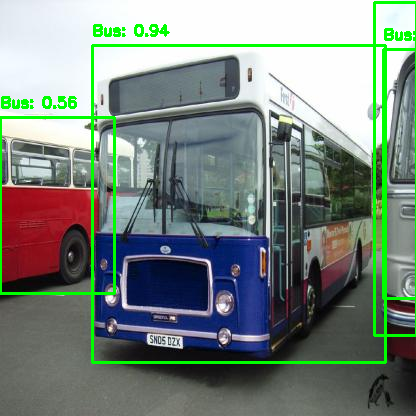

In [14]:
# Provide the image path manually
image_path = input("Enter the image path: ")  # Example: "/content/test.jpg"

# Read the image
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error loading image. Check path:", image_path)
else:
    # Perform object detection
    results = model_y11(image_path)

    # Loop through detections and draw bounding boxes
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes
        confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
        class_ids = result.boxes.cls.cpu().numpy().astype(int)  # Class IDs

        # Get class names from the model_y11
        class_names = model_y11.names

        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = map(int, box[:4])  # Convert to int
            label = f"{class_names[class_id]}: {conf:.2f}"  # Class label + confidence

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with detections
    cv2_imshow(image)


In [18]:
# Evaluate the YOLOv11 model
metrics = model_y11.val(data="/content/VehiclesDetectionDataset/dataset.yaml")
print(metrics)
# Access specific metrics
map50 = metrics.box.map50
map50_95 = metrics.box.map
print(f"mAP50: {map50}")
print(f"mAP50-95: {map50_95}")
print(f"Precision: {metrics.box.p}")
print(f"Recall: {metrics.box.r}")

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1291.0±278.1 MB/s, size: 30.3 KB)


val: Scanning /content/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]


                   all        250        454      0.582      0.535      0.576      0.419
             Ambulance         50         64      0.842      0.875      0.895      0.751
                   Bus         30         46      0.617      0.652      0.633      0.513
                   Car         90        238      0.578      0.487      0.495      0.331
            Motorcycle         42         46      0.464      0.391      0.518      0.274
                 Truck         38         60      0.412      0.267       0.34      0.228
Speed: 1.1ms preprocess, 25.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/yolo11m_finetuned3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd8a19aced0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']

In [17]:
# YOLOv8 Evaluation (already present in the provided code, just reorganized)
# model_v8 = YOLO("yolov8s.pt")
metrics_v8 = model_y8.val(data="/content/VehiclesDetectionDataset/dataset.yaml")

map50_v8 = metrics_v8.box.map50
map50_95_v8 = metrics_v8.box.map
precision_v8 = metrics_v8.box.p  # This is a NumPy array
recall_v8 = metrics_v8.box.r
f1_v8 = metrics_v8.box.f1

print("\nYOLOv8 Metrics:")
print(f"mAP50: {map50_v8}")
print(f"mAP50-95: {map50_95_v8}")
print(f"Precision: {precision_v8[0]:.4f}") # Access the first element for overall precision
print(f"Recall: {recall_v8[0]:.4f}") # Access the first element for overall recall
print(f"F1-score: {f1_v8[0]:.4f}")


# YOLOv11 Evaluation (modified to ensure correct usage after potential model loading)

#model_v11 = YOLO("yolo11m.pt") # Load the model here
metrics_v11 = model_y11.val(data="/content/VehiclesDetectionDataset/dataset.yaml")

map50_v11 = metrics_v11.box.map50
map50_95_v11 = metrics_v11.box.map
precision_v11 = metrics_v11.box.p  # This is a NumPy array
recall_v11 = metrics_v11.box.r
f1_v11 = metrics_v11.box.f1


print("\nYOLOv11 Metrics:")
print(f"mAP50: {map50_v11}")
print(f"mAP50-95: {map50_95_v11}")
print(f"Precision: {precision_v11[0]:.4f}") # Access the first element for overall precision
print(f"Recall: {recall_v11[0]:.4f}") # Access the first element for overall recall
print(f"F1-score: {f1_v11[0]:.4f}")


#Comparison
print("\nModel Comparison:")
print(f"mAP50-95: YOLOv8 ({map50_95_v8:.4f}) vs. YOLOv11 ({map50_95_v11:.4f})")
print(f"Precision: YOLOv8 ({precision_v8[0]:.4f}) vs. YOLOv11 ({precision_v11[0]:.4f})") # Access the first element
print(f"Recall: YOLOv8 ({recall_v8[0]:.4f}) vs. YOLOv11 ({recall_v11[0]:.4f})") # Access the first element

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 689.4±170.6 MB/s, size: 31.0 KB)


val: Scanning /content/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]


                   all        250        454      0.249      0.267      0.254      0.192
                person         50         64          0          0     0.0001      1e-05
               bicycle         30         46          0          0          0          0
                   car         90        238      0.546      0.597      0.539      0.396
            motorcycle         42         46        0.7      0.739      0.732      0.562
              airplane         38         60          0          0          0          0
Speed: 1.5ms preprocess, 9.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val

YOLOv8 Metrics:
mAP50: 0.2542616634345644
mAP50-95: 0.1915425908480162
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1237.9±318.6 MB/s, size: 29.2 KB)


val: Scanning /content/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.90it/s]


                   all        250        454      0.582      0.535      0.576      0.419
             Ambulance         50         64      0.842      0.875      0.895      0.751
                   Bus         30         46      0.617      0.652      0.633      0.513
                   Car         90        238      0.578      0.487      0.495      0.331
            Motorcycle         42         46      0.464      0.391      0.518      0.274
                 Truck         38         60      0.412      0.267       0.34      0.228
Speed: 0.9ms preprocess, 25.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolo11m_finetuned2

YOLOv11 Metrics:
mAP50: 0.5762650120693309
mAP50-95: 0.41929191155728085
Precision: 0.8416
Recall: 0.8750
F1-score: 0.8580

Model Comparison:
mAP50-95: YOLOv8 (0.1915) vs. YOLOv11 (0.4193)
Precision: YOLOv8 (0.0000) vs. YOLOv11 (0.8416)
Recall: YOLOv8 (0.0000) vs. YOLOv11 (0.8750)


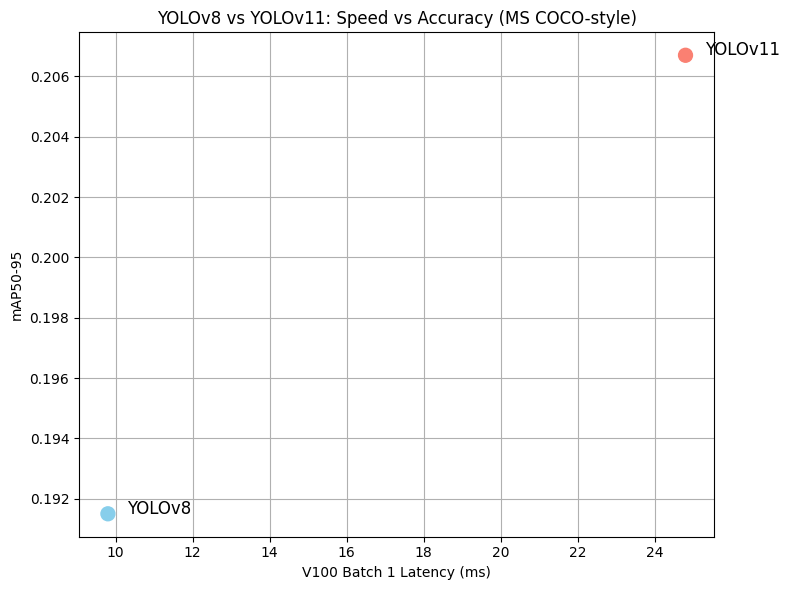

In [15]:
# Speed and Accuracy Plot
# Model names
models = ['YOLOv8', 'YOLOv11']

# Latency in milliseconds (from your logs)
latency = [9.8, 24.8]

# mAP50-95 values
map50_95 = [0.1915, 0.2067]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(latency, map50_95, color=['skyblue', 'salmon'], s=100)

# Annotate points
for i, model in enumerate(models):
    plt.text(latency[i] + 0.5, map50_95[i], model, fontsize=12)

# Styling the plot
plt.xlabel("V100 Batch 1 Latency (ms)")
plt.ylabel("mAP50-95")
plt.title("YOLOv8 vs YOLOv11: Speed vs Accuracy (MS COCO-style)")
plt.grid(True)
plt.tight_layout()
plt.show()


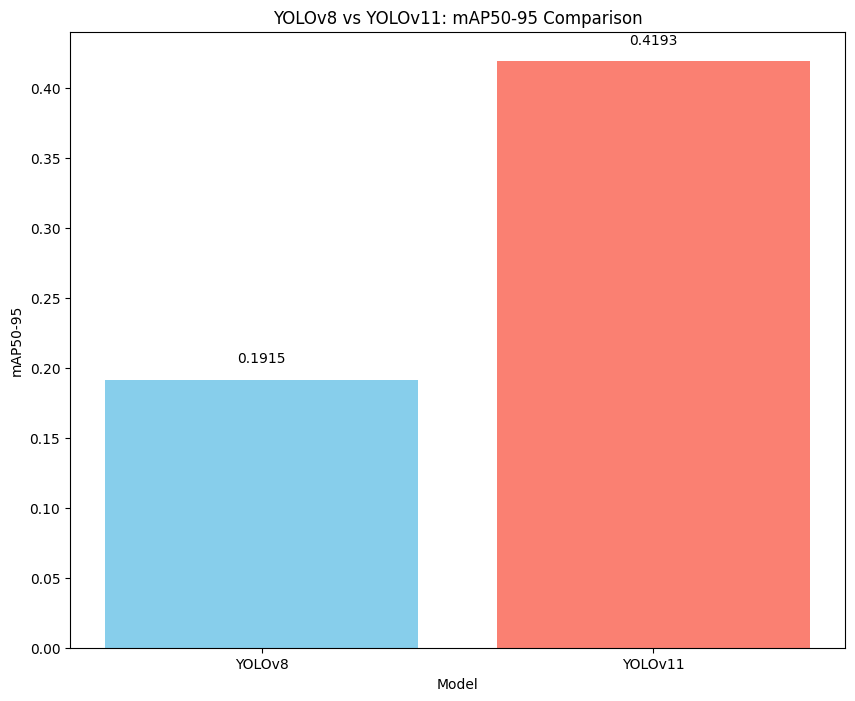

In [20]:
import matplotlib.pyplot as plt

# Model names
models = ['YOLOv8', 'YOLOv11']

# Example mAP50-95 values (replace with your actual values)
map50_95_values = [map50_95_v8, map50_95_v11]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.bar(models, map50_95_values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel("Model")
plt.ylabel("mAP50-95")
plt.title("YOLOv8 vs YOLOv11: mAP50-95 Comparison")

# Add value labels above the bars
for i, value in enumerate(map50_95_values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', va='bottom')

# Display the plot
plt.show()


In [21]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install pyngrok

In [22]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [23]:
# Authtoken of Ngrok
!ngrok config add-authtoken 2wRc5CGzKGWH87MOjIzDQ8XRJgh_7sKxQh1t3i1QbrhMt5iye

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Streamlit file app.py

In [24]:
%%writefile app.py

import streamlit as st
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO

# Load YOLO Model
model_path = 'yolo11m.pt'  # Ensure this model file exists
model = YOLO(model_path)

# Set Page Config with a Title & Background Image
st.set_page_config(
    page_title="YOLOv8 Object Detection",
    page_icon="🤖",
    layout="wide"
)

# Custom Background CSS
background_image_url = "https://images.unsplash.com/photo-1518770660439-4636190af475"
st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url("{background_image_url}");
        background-size: cover;
        background-position: center;
        color: white;
    }}
    .stButton > button {{
        background-color: #ff6600;
        color: white;
        font-size: 18px;
        border-radius: 10px;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

# UI Title
st.title("🚗 Object Detection App in Driving Enviroment")

# Upload Image
uploaded_file = st.file_uploader("📷 Upload an Image for Object Detection", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Convert to OpenCV format
    image = Image.open(uploaded_file)
    image_np = np.array(image)

    # Display the Uploaded Image
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Run YOLO Detection
    results = model(image_np)

    # Draw Bounding Boxes
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = box.conf[0]
            label = f"{model.names[cls]}: {conf:.2f}"

            # Draw bounding box
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image_np, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the Detection Results
    st.image(image_np, caption="Detected Objects", use_column_width=True)

# Footer
st.markdown(
    "<h4 style='text-align: center; color: white;'>🔍 Developed with YOLOv8 | Powered by AI</h4>",
    unsafe_allow_html=True
)


Writing app.py


In [26]:
!pkill -f ngrok

In [ ]:
# !streamlit run app.py &>/dev/null &

In [27]:
from pyngrok import ngrok
import subprocess

# Start Streamlit app
subprocess.Popen(['streamlit', 'run', 'app.py', '--server.port', '8501'])

# Open ngrok tunnel
public_url = ngrok.connect(addr='8501')
print(f"Access the Streamlit app here: {public_url}")

Access the Streamlit app here: NgrokTunnel: "https://fc27-34-90-4-238.ngrok-free.app" -> "http://localhost:8501"
